In [5]:
%matplotlib inline
import pandas as pd

In [6]:
compras_df = pd.read_csv('data/clean_compras.csv')

In [7]:
compras_df.head(5)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Visión general del dataset

In [8]:
compras_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [9]:
compras_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [10]:
compras_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


compras_df = compras_df[['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE','SHEET']]

## Análisis unidimencional de las variables

In [11]:
compras_df['SHEET'].value_counts()

SHEET
CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: count, dtype: int64

In [12]:
len(compras_df['CONCEPTO'].unique())

1396

In [13]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: count, dtype: int64

<Axes: >

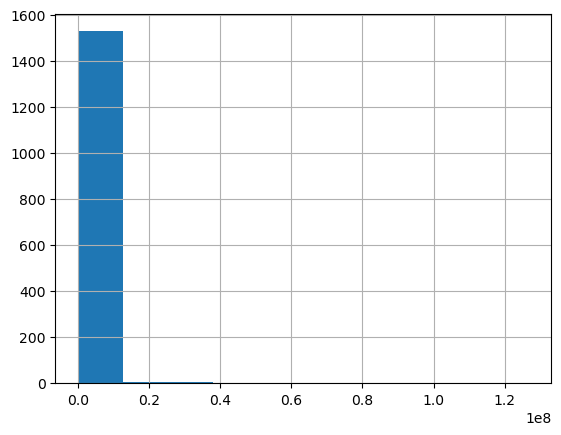

In [14]:
compras_df['IMPORTE'].hist()

<Axes: >

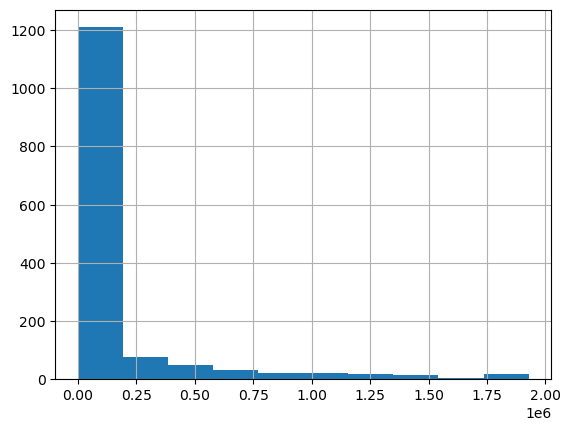

In [15]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<Axes: >

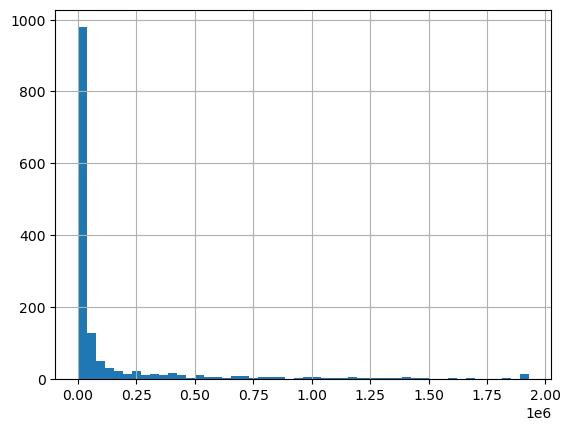

In [16]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [17]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)].head(5)

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


## Análisis multidimencional de las variables

In [18]:
sum_importe_beneficiario = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

<Axes: xlabel='BENEFICIARIO'>

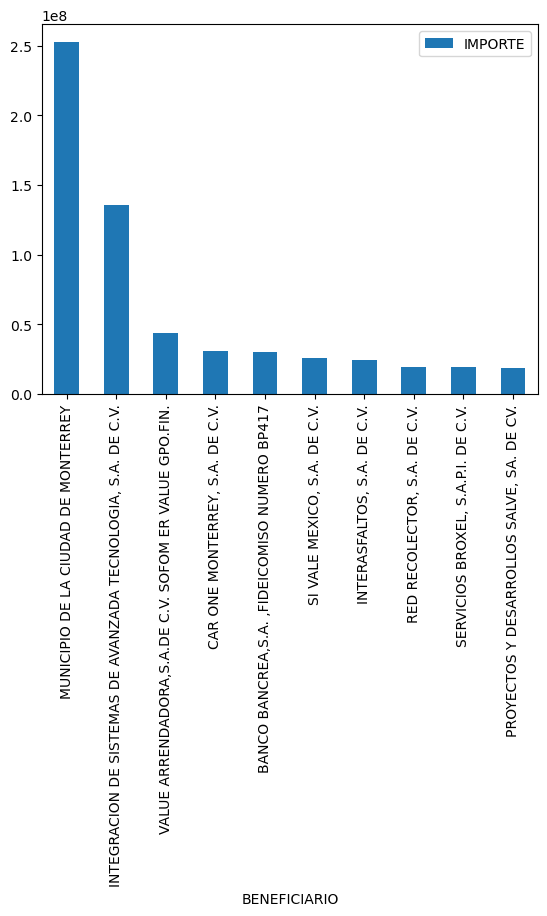

In [19]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [20]:
importa_df = compras_df.fillna(0, inplace=False)['IMPORTE']

importa_df = reset_index().sort_values(by='IMPORTE', asending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

In [21]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']

In [22]:
sum_importe_fecha

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [23]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

<Axes: >

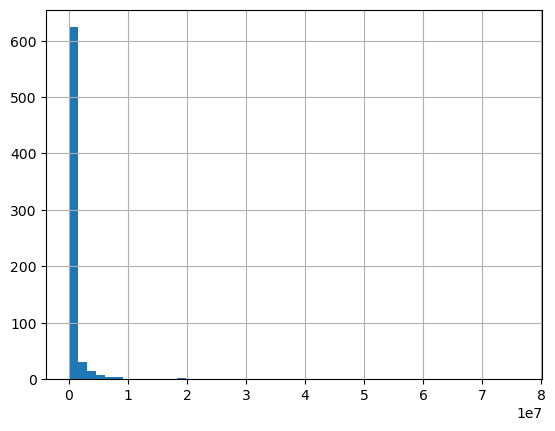

In [24]:
# Histograma
compras_gastos_df['IMPORTE'].hist(bins=50)

In [25]:
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,206894,MUNICIPIO DE LA CIUDAD DE MONTERREY,MCM610101PT2,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


In [26]:
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY'].value_counts()

NUM BEN  BENEFICIARIO                         RFC           FACTURA                CONTRATO   CONCEPTO                                                                                                                                    TIPO  # OP         FECHA       IMPORTE      SHEET                 
206894   MUNICIPIO DE LA CIUDAD DE MONTERREY  MCM610101PT2  158002-470             NO APLICA  FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA DE OBRAS PÚBLICAS A NOMBRE DE JOSÉ NAZARIO  PINEDA OSORIO RECIBO DE INGRESOS CON FOLIO:59793  CH    299000198.0  2020-12-30  1439.20      GASTOS VARIOS             1
                                                            158002-472             NO APLICA  FINIQUITO DE CAJA CHICA DE LA SECRETARÍA DE OBRAS PÚBLICAS A NOMBRE DE JOSÉ NAZARIO PINEDA OSORIO  RECIBO DE INGRESOS CON FOLIO:59794       CH    299000200.0  2020-12-30  2847.79      GASTOS VARIOS             1
                                                            2020-23-A-158004-1734  NO A

In [27]:
compras_sheet_beneficiario = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum() ['IMPORTE'].sort_values().unstack('SHEET')

In [28]:
top_beneficiarios = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

<Axes: xlabel='BENEFICIARIO'>

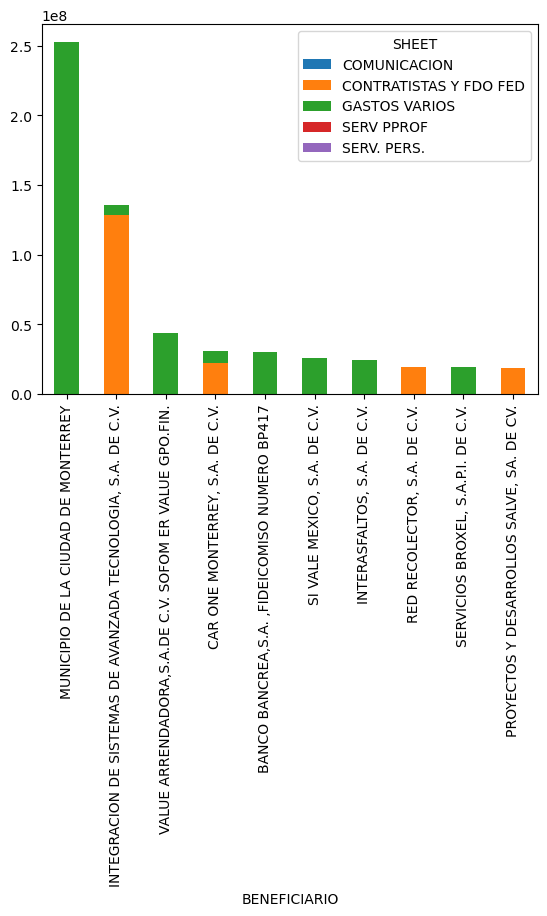

In [29]:
compras_sheet_beneficiario.loc[top_beneficiarios].plot.bar(stacked=True)

## Análisis de texto

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to C:\Users\Brayan
[nltk_data]     Vicente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
textos_compras = ''
for row in compras_df['CONCEPTO']: 
    textos_compras = textos_compras + ' ' + row

In [32]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [33]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [38]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len (x)>4])

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

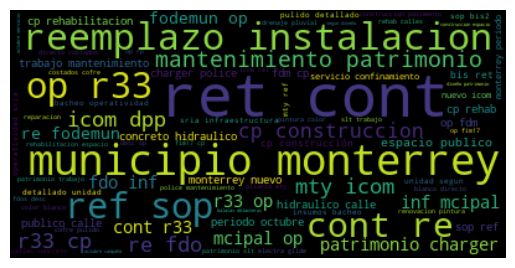

In [40]:
wc = WordCloud(background_color='black')
wc.generate(textos_compras)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()